In [2]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline

In [3]:
np.random.seed(1234)

#MALA

In [19]:
#Bayes rule
def target(likelihood, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(n, theta).pmf(h)*prior.pdf(theta)
    
n = 100
h = 61
a = 10
b = 10
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.3

delta = 0.01
gamma = 0.01


naccept = 0
theta = 0.1
niters = 1000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_1 = theta
    theta_2 = theta_1 + delta
    gradU = -(target(likelihood, prior, n, h, theta_2) - target(likelihood, prior, n, h, theta_1))/delta
    theta_p = theta +gamma*gradU + st.norm(0, sigma).rvs()
    rho = min(1, target(likelihood, prior, n, h, theta_p)*st.norm(0, sigma).pdf(theta)/[st.norm(gamma*gradU, sigma).pdf(theta_p)*target(likelihood, prior, n, h, theta )])
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
nmcmc = len(samples)//2
print "Efficiency = ", naccept/niters

Efficiency =  0.184


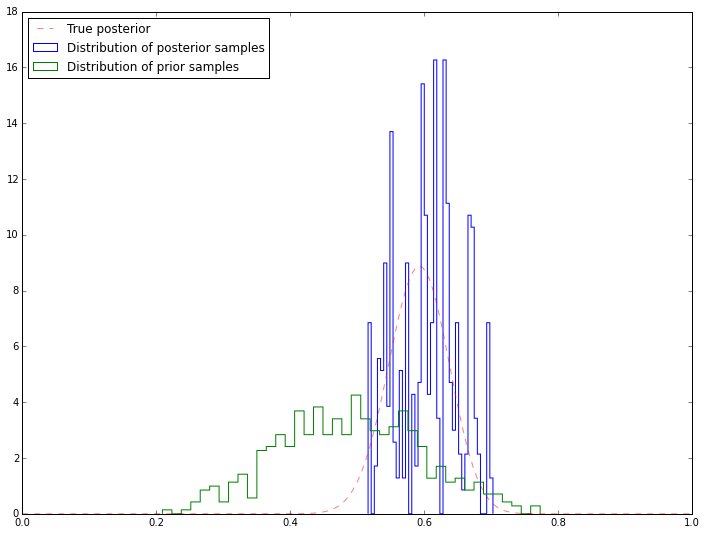

In [23]:
post = st.beta(h+a, n-h+b)
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

#No rejection (ULA)

In [3]:
#Bayes rule
def target(likelihood, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(n, theta).pmf(h)*prior.pdf(theta)

n = 100
h = 61
a = 10
b = 10
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.3

delta = 0.01
gamma = 0.001


naccept = 0
theta = 0.1
niters = 1000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_1 = theta
    theta_2 = theta_1 + delta
    gradU = -(target(likelihood, prior, n, h, theta_2) - target(likelihood, prior, n, h, theta_1))/delta
    #gradU = -(np.log(target(likelihood, prior, n, h, theta_2)) - np.log(target(likelihood, prior, n, h, theta_1)))/delta
    theta_p = theta +gamma*gradU + np.sqrt(2*gamma)*st.norm(0, sigma).rvs()
    theta = theta_p
    samples[i+1] = theta
    naccept+=1
nmcmc = len(samples)//2
print "Efficiency = ", naccept/niters

Efficiency =  1.0


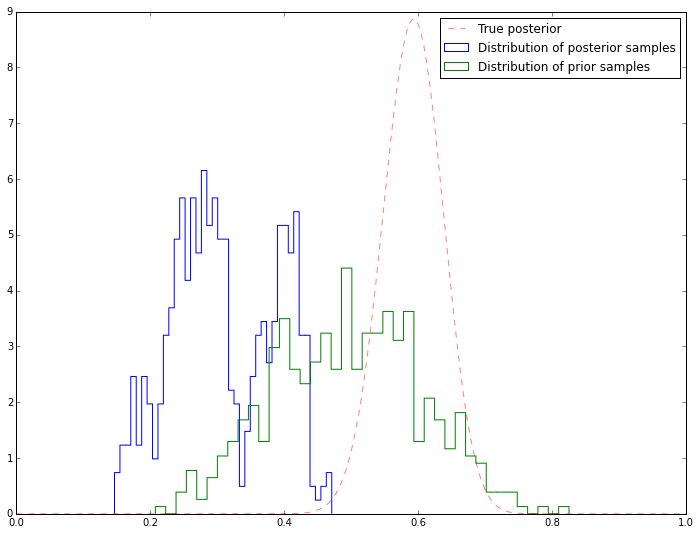

In [5]:
post = st.beta(h+a, n-h+b)
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

#Random Walk MH

In [24]:
#Bayes rule
def target(likelihood, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(n, theta).pmf(h)*prior.pdf(theta)

n = 100
h = 61
a = 10
b = 10
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.3

naccept = 0
theta = 0.1
niters = 1000
samples = np.zeros(niters+1)
samples[0] = theta
for i in range(niters):
    theta_p = theta + st.norm(0, sigma).rvs()
    rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
nmcmc = len(samples)//2
print naccept/niters

0.172


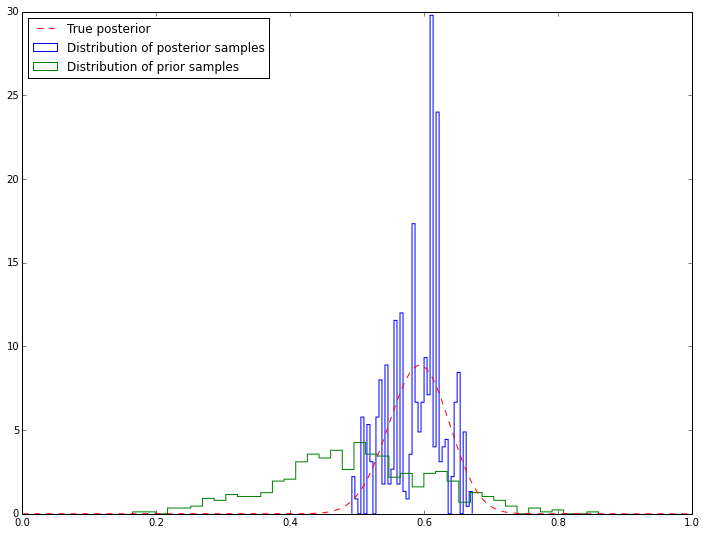

In [30]:
post = st.beta(h+a, n-h+b)
thetas = np.linspace(0, 1, 200)
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

#MH MALA and ULA comparison

In [3]:
def mh_chain(niters, n, h, theta, likelihood, prior, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
    return samples

In [15]:
def mala_chain(niters, n, h, theta, likelihood, prior, sigma):
    samples = [theta]
    gamma = 0.01
    delta = 0.01
    while len(samples) < niters:
        theta_1 = theta
        theta_2 = theta_1 + delta
        gradU = -(target(likelihood, prior, n, h, theta_2) - target(likelihood, prior, n, h, theta_1))/delta
        theta_p = theta +gamma*gradU + st.norm(0, sigma).rvs()
        rho = min(1, target(likelihood, prior, n, h, theta_p)*st.norm(0, sigma).pdf(theta)/[st.norm(gamma*gradU, sigma).pdf(theta_p)*target(likelihood, prior, n, h, theta )])
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
    return samples

In [16]:
def ula_chain(niters, n, h, theta, likelihood, prior, sigma):
    samples = [theta]
    gamma = 0.01
    delta = 0.01
    while len(samples) < niters:
        theta_1 = theta
        theta_2 = theta_1 + delta
        gradU = -(target(likelihood, prior, n, h, theta_2) - target(likelihood, prior, n, h, theta_1))/delta
        #gradU = -(np.log(target(likelihood, prior, n, h, theta_2)) - np.log(target(likelihood, prior, n, h, theta_1)))/delta
        theta_p = theta +gamma*gradU + np.sqrt(2*gamma)*st.norm(0, sigma).rvs()
        theta = theta_p
        samples.append(theta)
    return samples

In [84]:
#Compare MH and MALA
n = 100
h = 61
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.05
niters = 100

samples_mh = [mh_chain(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.25)]
samples_mala = [mala_chain(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.25)]

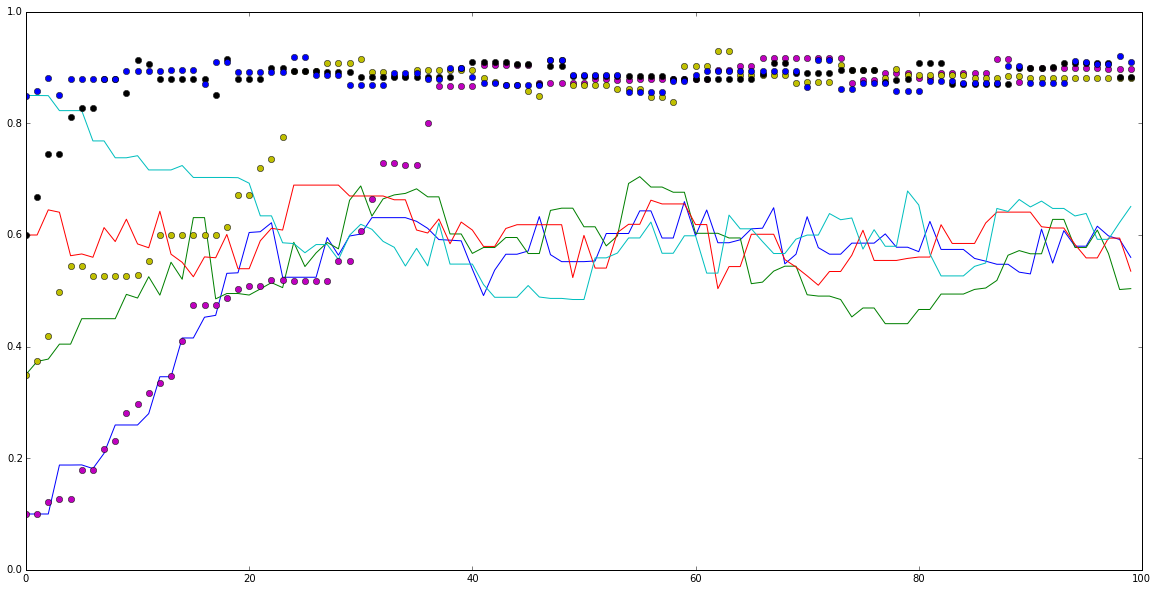

In [94]:
plt.figure(figsize=(20,10))
for samples in samples_mh:
    plt.plot(samples, '-')
for samples in samples_mala:
    plt.plot(samples, 'o')
plt.xlim([0, niters])
plt.ylim([0, 1]);

In [130]:
#Compare MH and ULA
n = 100
h = 61
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.05
niters = 100

samples_mh = [mh_chain(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.25)]
samples_ula = [ula_chain(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.25)]

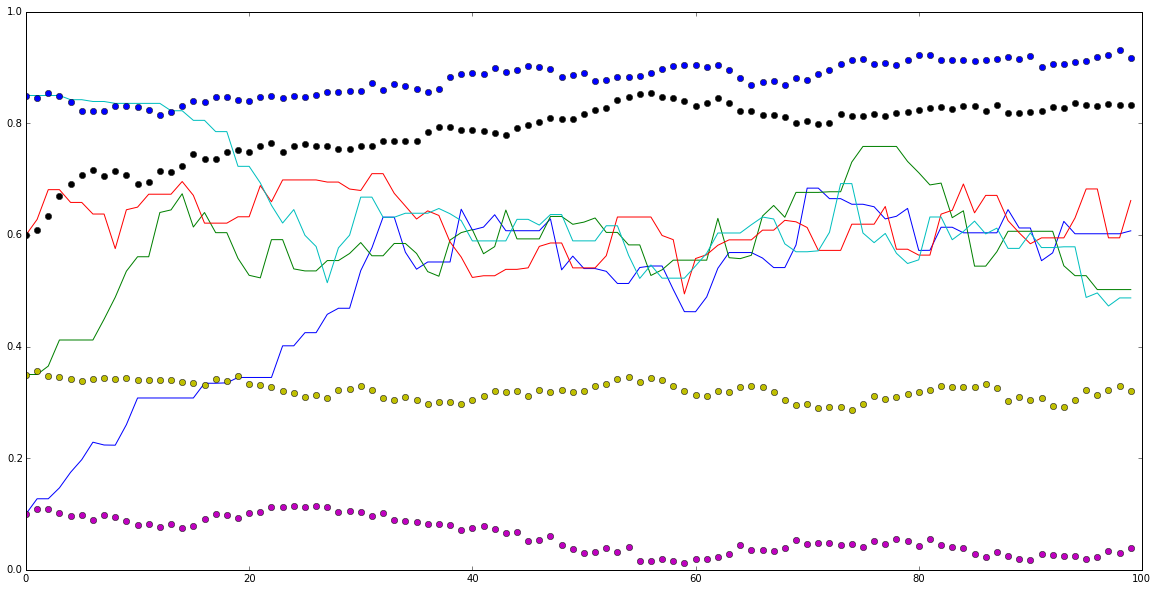

In [131]:
plt.figure(figsize=(20,10))
for samples in samples_mh:
    plt.plot(samples, '-')
for samples in samples_ula:
    plt.plot(samples, 'o')
plt.xlim([0, niters])
plt.ylim([0, 1]);

In [8]:
a = 10
b = 10
n = 100
h = 61
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.05
niters = 100

sampless = [mh_chain(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.25)]

In [15]:
post = st.beta(h+a, n-h+b)

In [18]:
thetas = np.linspace(0, 1, niters)

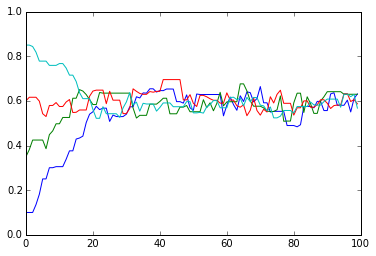

In [10]:
# Convergence of multiple chains

for samples in sampless:
    plt.plot(samples, '-')
plt.xlim([0, niters])
plt.ylim([0, 1]);

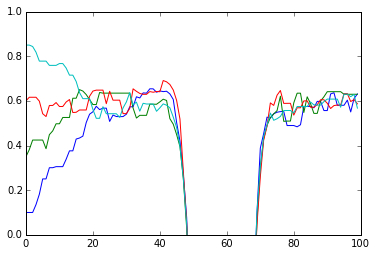

In [20]:
for samples in sampless:
    plt.plot(samples - post.pdf(thetas), '-')
plt.xlim([0, niters])
plt.ylim([0, 1]);

Compare two MH with different proposals

In [10]:
#proposal_1 (sigma = 0.05)
n = 100
h = 61
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.05
niters = 100

samples1= [mh_chain(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.5)]

In [11]:
#proposal_2 (sigma = 0.5)
n = 100
h = 61
likelihood = st.binom
prior = st.beta(a, b)
sigma = 0.5
niters = 100

samples2= [mh_chain(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.5)]

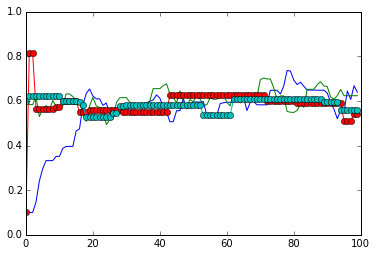

In [12]:
# Comparison of two MH

for samples in samples1:
    plt.plot(samples, '-')
for samples in samples2:
    plt.plot(samples, '-o')    
plt.xlim([0, niters])
plt.ylim([0, 1]);